In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
from textblob import TextBlob
import os
import chardet
import re

import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [2]:
fake_news = pd.read_csv('fake.csv',encoding='utf-8')
print(fake_news)

                                           uuid  ord_in_thread  \
0      6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1      2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2      c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3      7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4      0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   
5      8f30f5ea14c9d5914a9fe4f55ab2581772af4c31              0   
6      d3cc0fe38f41a59f7c48f8c3528ca5f74193148f              0   
7      b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4              0   
8      a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6              0   
9      f54d8e13010d0a79893995ee65360ad4b38b5a35              0   
10     4d3faf17519cfa46ca754ab8068428818dbb2bf3              0   
11     7f90d71cc69893f4c91e8a55f2c4da52d88cd7c1              0   
12     fd2c048d7e03f7260a8d75725b0441c627578f1a              0   
13     c8d4c0a88af223f1b41e3e966ecd98ceb22ab5fb              0   
14     f0b

In [3]:
bias_df = fake_news.loc[fake_news['type'] == 'bias'].copy()
bs_df = fake_news.loc[fake_news['type'] == 'bs'].copy()

In [4]:
bs_df

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,0,tokyowashi (noreply@blogger.com),2016-10-27T06:14:00.000+03:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,english,2016-10-27T07:37:58.775+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
60,03905a0f06cb711190aad3934af253a0e1c00a83,1,Anonymous,2016-10-26T23:12:00.000+03:00,NaN,"So ,you have Rothschild banksters and British ...",english,2016-10-27T07:37:58.893+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
61,42c16d3818e64ff4632409cafd309c22df530ac1,2,Anonymous,2016-10-26T22:48:00.000+03:00,NaN,Here is the problem . The USA constitution sta...,english,2016-10-27T07:37:58.902+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,3,Anonymous,2016-10-26T22:35:00.000+03:00,NaN,There is plenty of proof the machines are rigg...,english,2016-10-27T07:37:58.915+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
63,ea086a28e0bbafcd9fbaabd728920337371d4876,4,Anonymous,2016-10-26T22:19:00.000+03:00,NaN,Trump has an excuse now to audit any vote with...,english,2016-10-27T07:37:58.925+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
64,6fad6edc4156d92153a9a7a0d66f7ae59b98760c,5,Anonymous,2016-10-26T22:07:00.000+03:00,NaN,"He has got to go after him , he is the one cau...",english,2016-10-27T07:37:58.936+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,5,1,0,0,0,bs
65,30026d6f4721bb93578dffe88ee680e1dcbf20c8,6,Anonymous,2016-10-26T22:07:00.000+03:00,NaN,"He has got to go after him , he is the one cau...",english,2016-10-27T11:39:59.892+03:00,abeldanger.net,US,NaN,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,0.0,NaN,6,1,0,0,0,bs
66,4b9eb00294cc3efea62d55aa972b8218b588b55e,4,Anonymous,2016-10-26T22:35:00.000+03:00,NaN,There is plenty of proof the machines are rigg...,english,2016-10-27T11:40:03.654+03:00,abeldanger.net,US,NaN,Did Google Kill Julian Assange?,0.0,NaN,6,1,0,0,0,bs
67,11ecd71be0955967a9058366b7bee2499dbc3e95,5,Anonymous,2016-10-26T22:19:00.000+03:00,NaN,Trump has an excuse now to audit any vote with...,english,2016-10-27T11:40:03.667+03:00,abeldanger.net,US,NaN,Did Google Kill Julian Assange?,0.0,NaN,6,1,0,0,0,bs
68,269e89072d73ae89a8645199b121aaa497460f40,6,Anonymous,2016-10-26T22:07:00.000+03:00,NaN,"He has got to go after him , he is the one cau...",english,2016-10-27T11:40:03.678+03:00,abeldanger.net,US,NaN,Did Google Kill Julian Assange?,0.0,NaN,6,1,0,0,0,bs


In [5]:
def count_char(x):
    if isinstance(x,int):
        x = str(x)
    if isinstance(x,float):
        x = str(x)
    return sum(1 for c in x if c.isupper())

In [6]:
bias_df['subjectivity'] = bias_df['text'].apply(lambda x: TextBlob(x).sentiment[1])
bias_df['polarity'] = bias_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
bias_df['length'] = bias_df['text'].apply(lambda x: len(x))
bias_df['caps'] = bias_df['title'].apply(count_char)

In [7]:
bs_df['subjectivity'] = bs_df['text'].apply(lambda x: TextBlob(x).sentiment[1])
bs_df['polarity'] = bs_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
bs_df['length'] = bs_df['text'].apply(lambda x: len(x))
bs_df['caps'] = bs_df['title'].apply(count_char)

In [8]:
bias_df[['subjectivity','polarity','length','caps','text','title']]

,subjectivity,polarity,length,caps,text,title
0,0.405000,0.100000,505,13,Print They should pay all the back all the mon...,Muslims BUSTED: They Stole Millions In Gov’t B...
1,0.376488,0.054771,1789,10,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...
2,0.533667,0.183000,1363,18,Red State : \nFox News Sunday reported this mo...,BREAKING: Weiner Cooperating With FBI On Hilla...
3,0.916667,0.000000,271,44,Email Kayla Mueller was a prisoner and torture...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4,0.448784,0.176472,2095,32,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
5,0.668421,-0.264098,1256,9,Print Hillary goes absolutely berserk! She exp...,Hillary Goes Absolutely Berserk On Protester A...
6,0.521732,-0.012089,5870,38,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...
7,0.299206,0.003355,2527,57,BREAKING! NYPD Ready To Make Arrests In Weiner...,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...
8,0.379149,0.106304,1294,34,\nLimbaugh said that the revelations in the Wi...,BREAKING: CLINTON CLEARED...Was This A Coordin...
9,0.699851,-0.188244,727,43,Email \nThese people are sick and evil. They w...,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn..."


In [9]:
bias_df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares,subjectivity,polarity,length,caps
count,443.000000,442.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,3.367946,6955.246606,0.029172,6.033860,6.415350,34.643341,0.029345,34.643341,0.421011,0.059406,2086.559819,9.171558
std,10.266034,7661.747350,0.131427,15.630381,14.429543,154.611699,0.364172,154.611699,0.195627,0.178827,2432.074090,9.382394
min,0.000000,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000,1.000000,0.000000
25%,0.000000,1550.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.353645,0.000000,270.500000,1.000000
50%,0.000000,4617.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.444444,0.054771,1205.000000,9.000000
75%,0.000000,15846.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.511892,0.129690,2939.500000,13.500000
max,69.000000,25689.000000,0.998000,89.000000,72.000000,980.000000,7.000000,980.000000,1.000000,0.800000,14706.000000,57.000000


In [10]:
bs_df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares,subjectivity,polarity,length,caps
count,11492.000000,7457.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000,11492.000000
mean,0.863122,41492.913772,0.026973,1.314306,1.644448,6.179255,0.042029,6.179255,0.413920,0.069921,4011.767316,9.766794
std,6.550432,26982.855627,0.124810,9.733963,6.679226,60.483221,0.876734,60.483221,0.154279,0.124472,5878.791365,9.054833
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,0.000000,19375.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.366179,0.004914,1126.000000,4.000000
50%,0.000000,36674.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.432734,0.063371,2465.000000,8.000000
75%,0.000000,62759.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.490387,0.119228,4974.750000,13.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000,1.000000,1.000000,142961.000000,110.000000


In [11]:
paths = []
for root, dirs, files in os.walk(".", topdown=False): 
    for name in files:
        path = (os.path.join(root, name))
        if 'bbc' in path and path.endswith('.txt'):
            paths.append(path)

In [12]:
text_blobs = []
i = 0
for path in paths:
    with open(path, 'rb') as f:
        title = re.sub('[£—""…\n\"%]', ' ',f.readline()).strip()
        text = ' '.join([re.sub('[£—""…\n\"%]', ' ', x.strip().replace('"', ' ')) for x in f.readlines()])
        text_blob = TextBlob(text)
        text_blobs.append({'title':title,
                           'text':text,
                           'polarity':text_blob.sentiment[1],
                           'subjectivity':text_blob.sentiment[0],
                           'length':len(text),
                           'caps':count_char(title)})

In [13]:
bbc_news = pd.DataFrame(text_blobs)

In [14]:
bbc_news.head()

,caps,length,polarity,subjectivity,text,title
0,3,2525,0.459195,0.135920,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit
1,2,2218,0.349728,0.083193,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech
2,1,1517,0.230556,-0.003889,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim
3,3,2377,0.452101,0.154017,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits
4,2,1535,0.338725,0.025735,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq


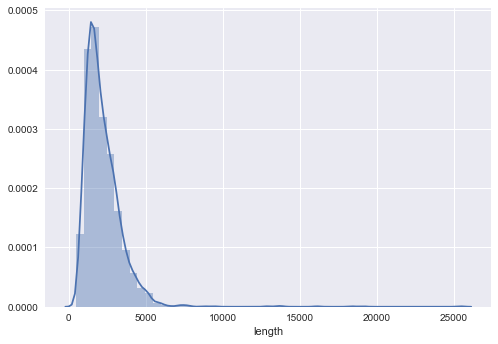

In [15]:
sns.distplot(bbc_news.length)
plt.show()

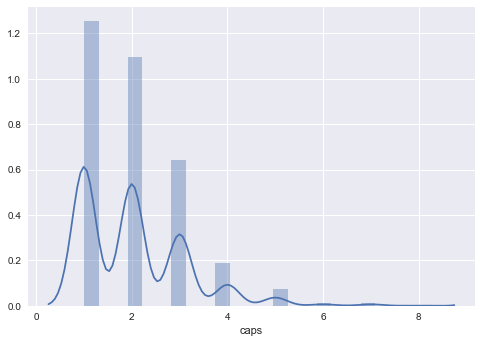

In [16]:
sns.distplot(bbc_news.caps)
plt.show()

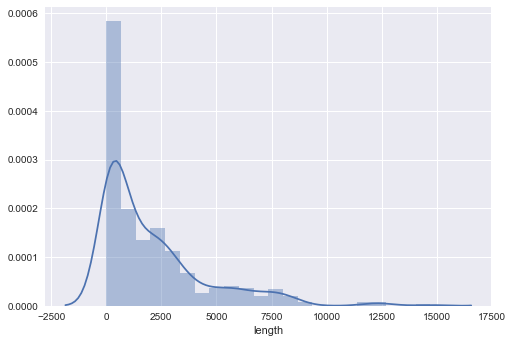

In [17]:
sns.distplot(bias_df['length'])
plt.show()

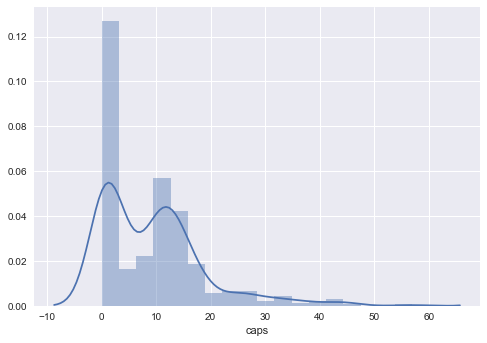

In [18]:
sns.distplot(bias_df['caps'])
plt.show()

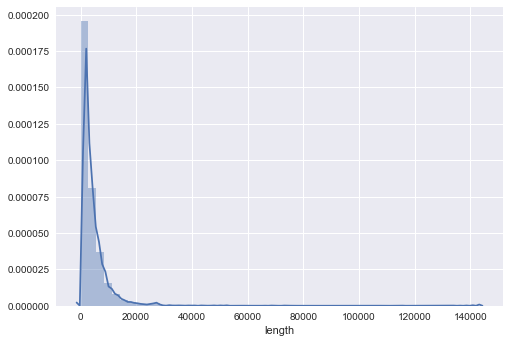

In [19]:
sns.distplot(bs_df['length'])
plt.show()

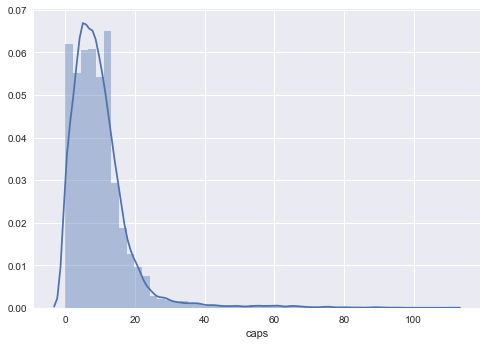

In [20]:
sns.distplot(bs_df['caps'])
plt.show()

In [22]:
onion_df = pd.read_csv('onion/onion_output.csv')

In [23]:
onion_df

,text,title,keywords,summary
0,NEW YORK—Though today he holds a powerful posi...,CEO Worked Way Up From Son Of CEO,NaN,NaN
1,The Official Tumblr for America's Finest News ...,WASHINGTON—Unable to contain his nausea at the...,NaN,NaN
2,"WILLOUGHBY, OH—Allowing no window whatsoever f...",Dad Hands Phone Off To Mom Immediately After B...,NaN,NaN
3,"MEDFORD, OR—Considering that everyone else at ...",China Censors Gay Kiss In ‘Alien: Covenant’,NaN,NaN
4,5 Things To Know About Jon Ossoff 5 Things To...,5 Things To Know About Trump’s Budget Proposal,NaN,NaN
5,WASHINGTON—Brainstorming the wondrous features...,Trump Accidentally Records Over Comey Meeting ...,NaN,NaN
6,The Onion is not intended for readers under 18...,A Primer on Elon Musk’s Business Initiatives,NaN,NaN
7,The Official Tumblr for America's Finest News ...,Visit theonion.com to see more from the standa...,NaN,NaN
8,The Onion is not intended for readers under 18...,Onion Fact Checks: Former FBI Director James C...,NaN,NaN
9,The Official Tumblr for America's Finest News ...,"STERLING, CO—Saying the condiment was really...",NaN,NaN


In [24]:
onion_df['subjectivity'] = onion_df['text'].astype(str).apply(lambda x: TextBlob(x.decode('utf-8')).sentiment[1])
onion_df['polarity'] = onion_df['text'].astype(str).apply(lambda x: TextBlob(x.decode('utf-8')).sentiment.polarity)
onion_df['length'] = onion_df['text'].apply(lambda x: len(str(x)))
onion_df['caps'] = onion_df['title'].apply(count_char)

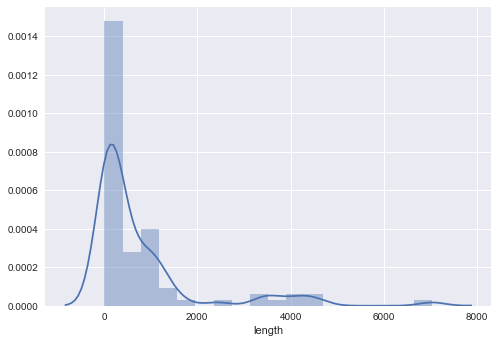

In [25]:
sns.distplot(onion_df['length'])
plt.show()

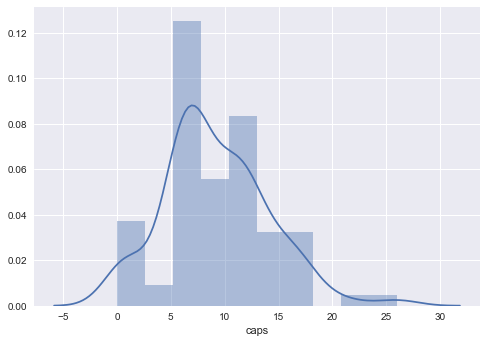

In [26]:
sns.distplot(onion_df['caps'])
plt.show()

In [27]:
beaver_df = pd.read_csv('beaverton.csv')

In [28]:
beaver_df['subjectivity'] = beaver_df['text'].astype(str).apply(lambda x: TextBlob(x.decode('utf-8')).sentiment[1])
beaver_df['polarity'] = beaver_df['text'].astype(str).apply(lambda x: TextBlob(x.decode('utf-8')).sentiment.polarity)
beaver_df['length'] = beaver_df['text'].apply(lambda x: len(str(x)))
beaver_df['caps'] = beaver_df['title'].apply(count_char)

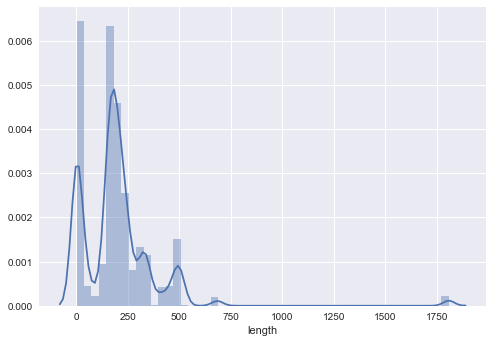

In [29]:
sns.distplot(beaver_df['length'])
plt.show()

2011


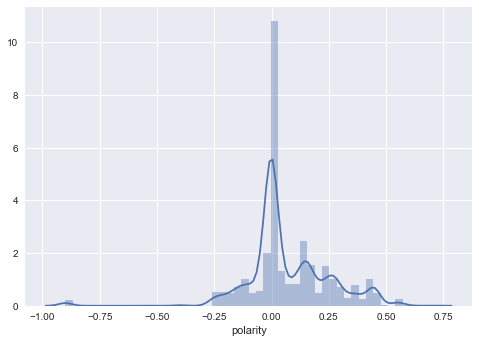

In [30]:
sns.distplot(beaver_df['polarity'])
print(len(beaver_df['subjectivity'].values))
plt.show()

In [31]:
def de_dupe(old_list):
    return [dict(t) for t in set([tuple(d.items()) for d in old_list])]

In [32]:
import xml.etree.cElementTree as ET
from kitchen.text.converters import getwriter, to_bytes, to_unicode

wiki_file = open('enwiki-20140116.xml')
wiki_articles = []

count = 0
for event, elem in ET.iterparse(wiki_file):
    if event == 'end':
        if elem.tag == 'title':
            title = elem.text
            title = to_bytes(title, 'utf-8')
            print(type(title))
        if elem.tag == 'content':
            text = elem.text
            text = to_bytes(text, 'utf-8')
            print(type(text))
        wiki_articles.append({'title':title,'text':text})
    elem.clear() # discard the element
    
wiki_articles = de_dupe(wiki_articles)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>

In [33]:
wiki_news = pd.DataFrame(wiki_articles)
wiki_news.describe()

,text,title
count,37505,37505
unique,18736,18753
top,None,Armed police arrest two more 21 July bombing s...
freq,36,2


In [34]:
wiki_news['subjectivity'] = wiki_news['text'].astype(str).apply(lambda x: TextBlob(x.decode('utf-8')).sentiment[1])
wiki_news['polarity'] = wiki_news['text'].astype(str).apply(lambda x: TextBlob(x.decode('utf-8')).sentiment.polarity)
wiki_news['length'] = wiki_news['text'].apply(lambda x: len(str(x)))
wiki_news['caps'] = wiki_news['title'].apply(count_char)

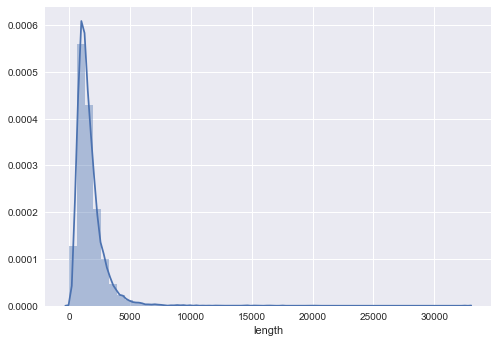

In [35]:
sns.distplot(wiki_news['length'])
plt.show()

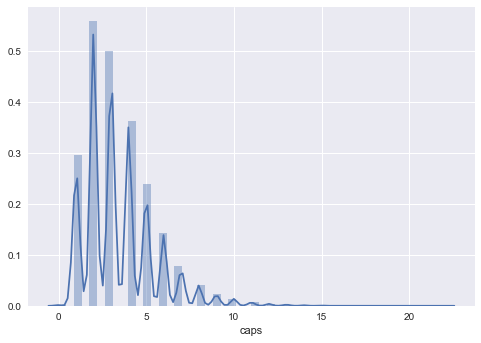

In [36]:
sns.distplot(wiki_news['caps'])
plt.show()

In [70]:
# get sub features from fake
f_sub = list(bias_df['subjectivity'])
f_sub.extend(bs_df['subjectivity'].values)
f_sub.extend(onion_df['subjectivity'].values)
f_sub.extend(beaver_df['subjectivity'].values)
print(len(f_sub))

#get polarity features from news
f_pol = list(bias_df['polarity'].values)
f_pol.extend(bs_df['polarity'].values)
f_pol.extend(onion_df['polarity'].values)
f_pol.extend(beaver_df['polarity'].values)

f_len = list(bias_df['length'].values)
f_len.extend(bs_df['length'].values)
f_len.extend(onion_df['length'].values)
f_len.extend(beaver_df['length'].values)

f_caps = list(bias_df['caps'].values)
f_caps.extend(bs_df['caps'].values)
f_caps.extend(onion_df['caps'].values)
f_caps.extend(beaver_df['caps'].values)

fake = np.array([f_sub,f_pol])
fake = fake.transpose()
print(fake.shape)

r_sub = list(bbc_news['subjectivity'].values)
r_sub.extend(wiki_news['subjectivity'].values)

r_pol = list(bbc_news['polarity'].values)
r_pol.extend(wiki_news['polarity'].values)

r_len = list(bbc_news['length'].values)
r_len.extend(wiki_news['length'].values)

r_caps = list(bbc_news['caps'].values)
r_caps.extend(wiki_news['caps'].values)

real = np.array([r_sub,r_pol])
real = real.transpose()
print(real)

14029
(14029, 2)
[[ 0.13591954  0.4591954 ]
 [ 0.08319296  0.34972816]
 [-0.00388889  0.23055556]
 ..., 
 [ 0.43152174  0.05398551]
 [ 0.418107    0.14444444]
 [ 0.30777778  0.05988095]]


In [75]:
x = np.vstack((fake,real))
y = np.hstack(((np.ones((fake.shape[0],), dtype=np.int)),(np.zeros((real.shape[0],), dtype=np.int))))
print(y.shape)

(53759,)


In [76]:
from sklearn import model_selection
test_size = 0.25
seed = 7
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

In [83]:
x_test

array([[ 0.56      ,  0.06      ],
       [ 0.35277778,  0.09097222],
       [ 0.38349403,  0.00355831],
       ..., 
       [ 0.18333333, -0.04      ],
       [ 0.48251701,  0.11647959],
       [ 0.3115    , -0.0065    ]])

In [89]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1, gamma=2) 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.73746868721942505

In [85]:
#Predict Output
predicted= model.predict(x_test)

In [86]:
error_df = pd.DataFrame(y_test.tolist(),columns=['correct'])
error_df['test'] = predicted
error_df['incorrect'] = error_df['test'] == error_df['correct']
error_df.sum()

correct      3444.0
test            0.0
incorrect    9996.0
dtype: float64

In [324]:
total_error = error_df.sum()['incorrect'] - error_df.sum()['correct']
print(total_error)
print(len(error_df))
print("% incorrect : {}".format(total_error/len(error_df)))

2115.0
14591
% incorrect : 0.144952367898


In [291]:
test_real1 = '''WASHINGTON — CIA Director Mike Pompeo says he thinks disclosure of America’s secret intelligence is on the rise, fueled partly by the “worship” of leakers like Edward Snowden.

“In some ways, I do think it’s accelerated,” Pompeo told MSNBC in an interview that aired Saturday. “I think there is a phenomenon, the worship of Edward Snowden, and those who steal American secrets for the purpose of self-aggrandizement or money or for whatever their motivation may be, does seem to be on the increase.”

Pompeo said the United States needs to redouble its efforts to stem leaks of classified information.

“It’s tough. You now have not only nation states trying to steal our stuff, but non-state, hostile intelligence services, well-funded — folks like WikiLeaks, out there trying to steal American secrets for the sole purpose of undermining the United States and democracy,” Pompeo said.

Besides Snowden, who leaked documents revealing extensive U.S. government surveillance, WikiLeaks recently released nearly 8,000 documents that it says reveal secrets about the CIA’s cyberespionage tools for breaking into computers. WikiLeaks previously published 250,000 State Department cables and embarrassed the U.S. military with hundreds of thousands of logs from Iraq and Afghanistan.


There are several other recent cases, including Chelsea Manning, the Army private formerly known as Bradley Manning. She was convicted in a 2013 court-martial of leaking more than 700,000 secret military and State Department documents to WikiLeaks while working as an intelligence analyst in Iraq. Manning said she leaked the documents to raise awareness about the war’s impact on innocent civilians.

Last year, former NSA contractor Harold Thomas Martin III, 51, of Glen Burnie, Maryland, was accused of removing highly classified information, storing it in an unlocked shed and in his car and home. Court documents say investigators seized, conservatively, 50 terabytes of information, or enough to fill roughly 200 laptop computers.

Pompeo said the Trump administration is focused on stopping leaks of any kind from any agency and pursuing perpetrators. “I think we’ll have some successes both on the deterrence side — that is stopping them from happening — as well as on punishing those who we catch who have done it,” Pompeo said.

On other issues, Pompeo said:

— North Korea poses a “very real danger” to U.S. national security. “I hardly ever escape a day at the White House without the president asking me about North Korea and how it is that the United States is responding to that threat. It’s very much at the top of his mind.” He said the North Koreans are “ever-closer to having the capacity to hold America at risk with a nuclear weapon.”

–Pompeo said U.S. national security also is threatened by Iran, which he described as the world’s largest state sponsor of terror.

“Today, we find it with enormous influence, influence that far outstrips where it was six or seven years ago,” said Pompeo, a former Republican congressman from Kansas. “Whether it’s the influence they have over the government in Baghdad, whether it’s the increasing strength of Hezbollah and Lebanon, their work alongside the Houthis in Iran, the Iraqi Shias that are fighting along now the border in Syria — certainly the Shia forces that are engaged in Syria. Iran is everywhere throughout the Middle East.”'''

In [292]:
test_fake1 = '''An appellate court in Arizona ruled that DREAMers cannot receive in-state tuition. Each state can determine whether it can give these tax-supported benefits, the court held.
Under the ruling, illegal immigrants that have Deferred Action for Childhood Arrivals (DACA) status may not pay the in-state tuition rate.

“The decision is key because in-state tuition is yet another benefit that acts as a magnet for illegal aliens choosing to make the reckless and irresponsible decision to bring their children illegally across our sovereign borders,” Immigration Reform Law Institute’s (IRLI) executive director and general counsel, Dale Wilcox told Breitbart Texas.

Arizona voters passed Proposition 300 (“Prop 300”) in November 2006 which incorporated federal law to prohibit these postsecondary education benefits to non-qualified aliens who are residents of the state.

While the federal Personal Responsibility and Work Opportunity Reconciliation Act (PRWORA) passed by Congress in 1996 generally allows the states to determine what public benefits are available for illegal immigrants, the Illegal Immigration Reform and Immigrant Responsibility Act (IIRIRA) “does not allow any state to provide non-qualified aliens with postsecondary education benefits based upon their residence within the state.”

The appellate court noted that the Obama Administration decided to defer deportation of illegal aliens who entered the country as children – the Deferred Action Against Childhood Arrivals (DACA) program. One of the defendants in the lawsuit, the Maricopa County Community College District Board, began accepting employment authorization documents (EADs) issued by the U.S. Department of Homeland Security (DHS) as evidence that they qualified for residence-based, in-state tuition.

“The decision is certainly a victory for those Americans who appreciate and understand what a law-and-order society really looks like,” the general counsel for IRLI told Breitbart Texas.

Wilcox added, “Disturbingly, there have been several courts that have attempted to codify DACA-recipients as somehow being a lawful and benefits-eligibility class of persons, much like citizens and legal residents. But this is absolutely not the case when one looks honestly at our democratically-enacted laws.”

“DACA-recipients are illegal aliens, and they are still absolutely removable under the law,” the immigration expert and lawyer said.

The vice president of the Arizona DREAM Act Coalition, Korina Iribe, is one of the approximately 28,000 DACA recipients in Arizona, KJZZ reported.

She told Maricopa Community Colleges’ KJZZ, “It’s a road block.”

“I know that we’re going to continue to band together and fight to make sure that we continue to have in-state tuition,” she stated.

A spokesman for the college district was reported to release a statement saying, “The Maricopa County Community College District is built on a foundation of providing access to higher education for diverse students and communities, and we continue to be committed to that mission.”

Arizona Court of Appeals, Division One’s Presiding Judge Kenton D. Jones wrote the majority opinion. It reversed the opinion of the lower Superior Court in Maricopa County. Republican Attorney General Mark Brnovich appealed the trial court’s orders denying the State’s motion for judgment on the pleadings and granting summary judgment in favor of the college district.

The Supreme Court of Arizona is the next higher appellate court and the college district and other plaintiffs can appeal to that court.

After the ruling, @OneArizona, a non-partisan coalition of 19 organizations “dedicated to Latino voter registration, immigration, economic justice and education,” tweeted, “We have been brave before and we will be brave again and again.”'''

In [65]:
test_fake2 = '''TORONTO – During tonight’s closing ceremonies for the Pan American games in Toronto, the event’s headlining act, Kanye West, took to the stage before his cue to berate the Pan Am Games for not giving a gold medal to Beyonce.

“I respect what you do being the whitest dude on Earth, but I’m-a let you finish,” said West as he cut in front of Pan Am Chair David Peterson at the podium.

“I’m just saying that Beyonce had the greatest javelin toss of all time.”

Minutes later, Kanye West tweeted a simple hashtag, #GoldForQueenB, which has subsequently been retweeted over 700 times.'''

In [87]:
tb = TextBlob(test_fake2.decode('utf-8'))
test_x = np.array([tb.sentiment.polarity,tb.sentiment[1]])
test_x = test_x.reshape(1, -1) 
test_pred = model.predict(test_x)

In [88]:
test_pred

array([0])

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))